In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
#from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.14.0


In [2]:
def preproc(df):
    df = df.drop('Id', axis=1)
    
    # eliminar colunas que nao tem dados suficientes
    df = df.drop('Alley', axis=1)
    df = df.drop('FireplaceQu', axis=1)
    df = df.drop('PoolQC', axis=1)
    df = df.drop('Fence', axis=1)
    df = df.drop('MiscFeature', axis=1)
    
    df = df.fillna(df.mean())
    
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imputed_DF = df
    for col in df.columns:
        if (df[col].isna().any()):
            imputed_column = imp.fit_transform(np.array(df[col]).reshape(-1, 1))
            #Fill in Series on DataFrame
            imputed_DF[col] = imputed_column

    df = imputed_DF
    imputed_DF.info()
    
    categorical_feature_mask = df.dtypes==object
    categorical_cols = df.columns[categorical_feature_mask].tolist()
    #print (categorical_cols)
    
    '''
    concat_df = df
    lb_style = LabelBinarizer()
    for col in categorical_cols:
        lb_results = lb_style.fit_transform(df[col])
        if (lb_results.shape[1] == 1):
            concat_df[col] = lb_results
        else:
            lb_df = pd.DataFrame(lb_results, columns=lb_style.classes_)
            for cls in lb_style.classes_:
                concat_df[cls] = lb_df[cls]
            concat_df = concat_df.drop(col, axis=1)
    df = concat_df
    '''
    df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
    
    return df

# Modelo

In [3]:
train_df = pd.read_csv('train.csv')
train_df = preproc(train_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 233 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(196)
memory usage: 701.6 KB


In [5]:
train_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.000000,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.000000,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.000000,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.000000,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.000000,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
5,50,85.000000,14115,5,5,1993,1995,0.0,732,0,...,0,0,0,0,1,0,0,0,1,0
6,20,75.000000,10084,8,5,2004,2005,186.0,1369,0,...,0,0,0,0,1,0,0,0,1,0
7,60,70.049958,10382,7,6,1973,1973,240.0,859,32,...,0,0,0,0,1,0,0,0,1,0
8,50,51.000000,6120,7,5,1931,1950,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,190,50.000000,7420,5,6,1939,1950,0.0,851,0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,0.003425,0.003425,0.083562,0.002055,0.867808,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,...,0.058440,0.058440,0.276824,0.045299,0.338815,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
def prep_values(df, drop_labels=True):
    if (drop_labels):
        y_values = pd.DataFrame(df['SalePrice']).values
        x_values = df.drop('SalePrice', axis=1)#.iloc[:,1:].values
    else:
        y_values = None
        x_values = df.values
    
    # normalizar os dados
    scaler = MinMaxScaler()
    x_values = scaler.fit_transform(x_values)
    return x_values, y_values

In [8]:
x_values, y_values = prep_values(train_df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

In [10]:
X_train.shape

(1168, 232)

In [11]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,0.217390,0.168300,0.042260,0.564783,0.571597,0.719197,0.579224,0.064620,0.076915,0.032889,...,0.002568,0.003425,0.084760,0.001712,0.872432,0.003425,0.007705,0.016267,0.815068,0.086473
std,0.248517,0.076763,0.037003,0.154177,0.139518,0.216646,0.345427,0.110196,0.081265,0.111573,...,0.050637,0.058445,0.278644,0.041363,0.333752,0.058445,0.087479,0.126555,0.388408,0.281181
min,0.000000,0.000000,0.000827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.133562,0.029439,0.444444,0.500000,0.594203,0.266667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.167979,0.038458,0.555556,0.500000,0.724638,0.733333,0.000000,0.066354,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.195205,0.047884,0.666667,0.625000,0.927536,0.900000,0.105000,0.123184,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.763561,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
pd.DataFrame(X_train).head(10)

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
0,0.176471,0.099315,0.021968,0.555556,0.625,0.485507,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.058824,0.167979,0.035308,0.555556,0.625,0.318841,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.176471,0.133562,0.045329,0.444444,0.500,0.500000,0.166667,0.000000,0.072289,0.284939,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.176471,0.150685,0.030400,0.333333,0.250,0.405797,0.000000,0.000000,0.110206,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,0.202055,0.038795,0.666667,0.500,0.702899,0.316667,0.105000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.000000,0.215753,0.034392,0.555556,0.500,0.673913,0.250000,0.063125,0.113926,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.133562,0.042693,0.333333,0.500,0.601449,0.083333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,0.000000,0.154110,0.057935,0.444444,0.500,0.956522,0.900000,0.000000,0.114458,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.000000,0.352740,0.069448,0.666667,0.500,0.963768,0.916667,0.010000,0.225726,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.294118,0.133562,0.044404,0.666667,0.875,0.130435,0.800000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# create model
model = keras.Sequential()

model.add(keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(128, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(64, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(32, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(16, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(16, activation='relu'))
#model.add(keras.layers.Activation(tf.nn.relu))
model.add(keras.layers.Dense(1))

# compile
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

W0707 22:05:30.151025 140398519248640 deprecation.py:506] From /home/lucas/.conda/envs/py3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
#model.fit(X_train_norm, y_train, epochs=10, validation_data=(X_val_norm, y_val))
hist = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Train on 1168 samples, validate on 146 samples
Epoch 1/50
1168/1168 [==============================] - 1s 464us/sample - loss: 38391258687.1233 - mean_absolute_error: 179943.3906 - val_loss: 39271848581.2603 - val_mean_absolute_error: 177922.1250
Epoch 2/50
1168/1168 [==============================] - 0s 51us/sample - loss: 38389217756.9315 - mean_absolute_error: 179937.7188 - val_loss: 39265966444.7123 - val_mean_absolute_error: 177905.7812
Epoch 3/50
1168/1168 [==============================] - 0s 66us/sample - loss: 38374833951.5616 - mean_absolute_error: 179898.2500 - val_loss: 39228836821.9178 - val_mean_absolute_error: 177802.5781
Epoch 4/50
1168/1168 [==============================] - 0s 47us/sample - loss: 38291691435.8356 - mean_absolute_error: 179670.1875 - val_loss: 39031682202.3014 - val_mean_absolute_error: 177253.6406
Epoch 5/50
1168/1168 [==============================] - 0s 51us/sample - loss: 37891316525.5890 - mean_absolute_error: 178566.9375 - val_loss: 38169535726.4

1168/1168 [==============================] - 0s 42us/sample - loss: 1185616093.8082 - mean_absolute_error: 21438.6523 - val_loss: 2050899855.7808 - val_mean_absolute_error: 23993.2715
Epoch 43/50
1168/1168 [==============================] - 0s 36us/sample - loss: 1150916970.9589 - mean_absolute_error: 21407.3008 - val_loss: 2026106517.9178 - val_mean_absolute_error: 23733.8262
Epoch 44/50
1168/1168 [==============================] - 0s 33us/sample - loss: 1131292435.2877 - mean_absolute_error: 21048.8203 - val_loss: 1987927804.4932 - val_mean_absolute_error: 23570.7324
Epoch 45/50
1168/1168 [==============================] - 0s 37us/sample - loss: 1108353704.7671 - mean_absolute_error: 20842.6094 - val_loss: 1945319668.6027 - val_mean_absolute_error: 23425.4238
Epoch 46/50
1168/1168 [==============================] - 0s 48us/sample - loss: 1096362627.5068 - mean_absolute_error: 20705.4023 - val_loss: 1889901397.9178 - val_mean_absolute_error: 23394.6562
Epoch 47/50
1168/1168 [=========

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

146/146 [==============================] - 0s 94us/sample - loss: 1377567638.7945 - mean_absolute_error: 25943.8535
Test accuracy: 25943.854


In [16]:
model.save('final_model.h5')

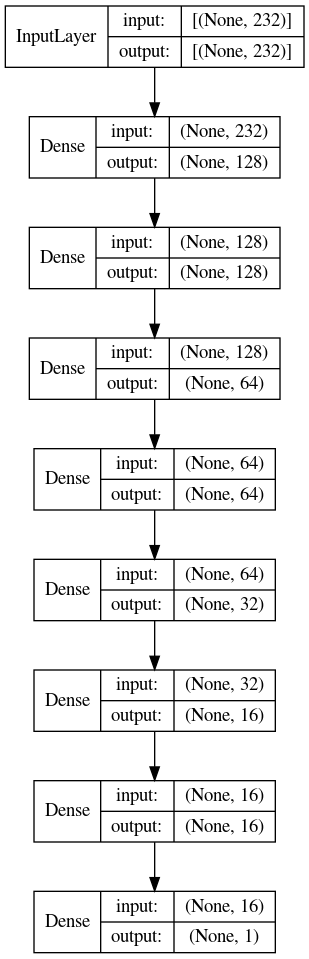

In [17]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [18]:
history = hist

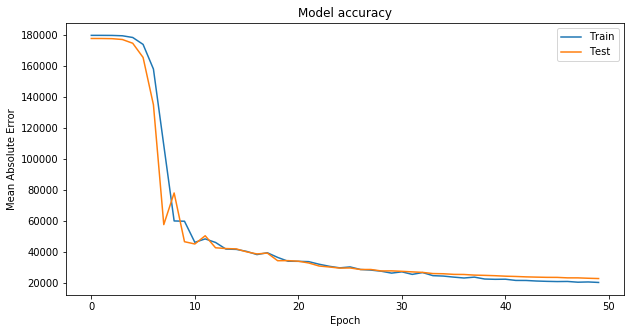

In [19]:
# Plot training & validation accuracy values
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history.history['mean_absolute_error'])
ax.plot(history.history['val_mean_absolute_error'])
ax.set(title='Model accuracy',
       ylabel='Mean Absolute Error', 
       xlabel='Epoch')
ax.legend(['Train', 'Test'], loc='best')
plt.show()

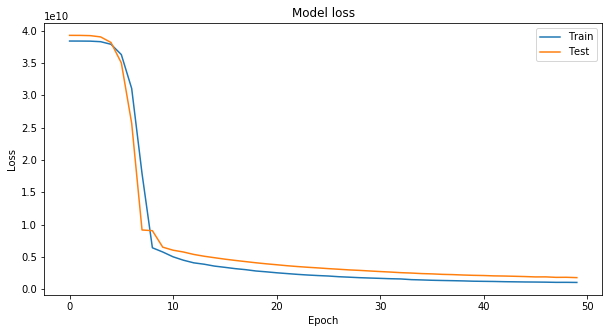

In [21]:
# Plot training & validation loss values
'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
'''
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set(title='Model loss',
       ylabel='Loss', 
       xlabel='Epoch')
ax.legend(['Train', 'Test'], loc='best')
plt.show()